# San Francisco Crime Data

In [143]:
import pandas as pd
import matplotlib as plt
import numpy as np
from collections import Counter 
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline
df = pd.read_csv('datasets/san-francisco-crime-classification/train.csv')
df.tail()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607
878048,2003-01-06 00:01:00,FORGERY/COUNTERFEITING,"CHECKS, FORGERY (FELONY)",Monday,BAYVIEW,NONE,1800 Block of NEWCOMB AV,-122.394926,37.738212


In [144]:
df.describe()


df.loc[df['Resolution'] == 'PROSECUTED BY OUTSIDE AGENCY', ['Resolution']] = 'PROSECUTED'
df.loc[df['Resolution'] == 'PROSECUTED FOR LESSER OFFENSE', ['Resolution']] = 'PROSECUTED'
df.loc[df['Resolution'] == 'DISTRICT ATTORNEY REFUSES TO PROSECUTE', ['Resolution']] = 'NOT PROSECUTED'
df.loc[df['Resolution'] == 'COMPLAINANT REFUSES TO PROSECUTE', ['Resolution']] = 'NOT PROSECUTED'
df.loc[df['Resolution'] == 'ARREST, BOOKED', ['Resolution']] = 'BOOKED'
df.loc[df['Resolution'] == 'JUVENILE BOOKED', ['Resolution']] = 'BOOKED'
df.loc[df['Resolution'] == 'ARREST, CITED', ['Resolution']] = 'CITED'
df.loc[df['Resolution'] == 'JUVENILE CITED', ['Resolution']] = 'CITED'
df.loc[df['Resolution'] == 'EXCEPTIONAL CLEARANCE', ['Resolution']] = 'CLEARED'
df.loc[df['Resolution'] == 'CLEARED-CONTACT JUVENILE FOR MORE INFO', ['Resolution']] = 'CLEARED'




hist = Counter(df["Resolution"])
num_labels = len(Counter(df["Resolution"]))
display(hist)

Counter({'BOOKED': 211967,
         'CITED': 80336,
         'CLEARED': 1747,
         'JUVENILE ADMONISHED': 1455,
         'JUVENILE DIVERTED': 355,
         'LOCATED': 17101,
         'NONE': 526790,
         'NOT PROSECUTED': 11624,
         'PROSECUTED': 2555,
         'PSYCHOPATHIC CASE': 14534,
         'UNFOUNDED': 9585})

In [145]:
df.Category.unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING', 'SEX OFFENSES NON FORCIBLE',
       'EXTORTION', 'GAMBLING', 'BAD CHECKS', 'TREA', 'RECOVERED VEHICLE',
       'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

In [146]:
len(df.Category.unique())

39

In [147]:
hist = Counter(df['Category'])

In [148]:
histdict = dict(hist)
histdict

{'ARSON': 1513,
 'ASSAULT': 76876,
 'BAD CHECKS': 406,
 'BRIBERY': 289,
 'BURGLARY': 36755,
 'DISORDERLY CONDUCT': 4320,
 'DRIVING UNDER THE INFLUENCE': 2268,
 'DRUG/NARCOTIC': 53971,
 'DRUNKENNESS': 4280,
 'EMBEZZLEMENT': 1166,
 'EXTORTION': 256,
 'FAMILY OFFENSES': 491,
 'FORGERY/COUNTERFEITING': 10609,
 'FRAUD': 16679,
 'GAMBLING': 146,
 'KIDNAPPING': 2341,
 'LARCENY/THEFT': 174900,
 'LIQUOR LAWS': 1903,
 'LOITERING': 1225,
 'MISSING PERSON': 25989,
 'NON-CRIMINAL': 92304,
 'OTHER OFFENSES': 126182,
 'PORNOGRAPHY/OBSCENE MAT': 22,
 'PROSTITUTION': 7484,
 'RECOVERED VEHICLE': 3138,
 'ROBBERY': 23000,
 'RUNAWAY': 1946,
 'SECONDARY CODES': 9985,
 'SEX OFFENSES FORCIBLE': 4388,
 'SEX OFFENSES NON FORCIBLE': 148,
 'STOLEN PROPERTY': 4540,
 'SUICIDE': 508,
 'SUSPICIOUS OCC': 31414,
 'TREA': 6,
 'TRESPASS': 7326,
 'VANDALISM': 44725,
 'VEHICLE THEFT': 53781,
 'WARRANTS': 42214,
 'WEAPON LAWS': 8555}

In [149]:
df["PdDistrict"].unique()

array(['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
       'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN'], dtype=object)

In [150]:
distdicthist = Counter(df["PdDistrict"])
distdicthist

Counter({'BAYVIEW': 89431,
         'CENTRAL': 85460,
         'INGLESIDE': 78845,
         'MISSION': 119908,
         'NORTHERN': 105296,
         'PARK': 49313,
         'RICHMOND': 45209,
         'SOUTHERN': 157182,
         'TARAVAL': 65596,
         'TENDERLOIN': 81809})

In [151]:
descdicthist = Counter(df["Descript"])
descdicthist

Counter({'ABANDONMENT OF CHILD': 101,
         'ABORTION': 6,
         'ACCESS CARD INFORMATION, PUBLICATION OF': 8,
         'ACCESS CARD INFORMATION, THEFT OF': 311,
         'ACCIDENTAL BURNS': 2,
         'ACCIDENTAL SHOOTING': 13,
         'ACTS AGAINST PUBLIC TRANSIT': 325,
         'ADVERTISING DISTRIBUTORS PERMIT VIOLATION': 34,
         'AEROSOL CONTAINER; SALE, PURCHASE OR POSSESSION OF': 24,
         'AFFIXING ADVERTISMENTS TO POLES': 3,
         'AGGRAVATED ASSAULT OF POLICE OFFICER, SNIPING': 1,
         'AGGRAVATED ASSAULT OF POLICE OFFICER,BODILY FORCE': 170,
         'AGGRAVATED ASSAULT ON POLICE OFFICER WITH A GUN': 6,
         'AGGRAVATED ASSAULT ON POLICE OFFICER WITH A KNIFE': 19,
         'AGGRAVATED ASSAULT WITH A DEADLY WEAPON': 6451,
         'AGGRAVATED ASSAULT WITH A GUN': 1071,
         'AGGRAVATED ASSAULT WITH A KNIFE': 2442,
         'AGGRAVATED ASSAULT WITH BODILY FORCE': 4898,
         'AGGRESSIVE SOLICITING': 170,
         'AID OR HARBOR FELON': 25,
    

In [152]:
df.iloc(0)

In [153]:
df[df["Descript"] == "PLACING WIFE IN HOUSE OF PROSTITUTION"]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
489364,2008-06-24 17:35:00,PROSTITUTION,PLACING WIFE IN HOUSE OF PROSTITUTION,Tuesday,NORTHERN,BOOKED,1500 Block of EDDY ST,-122.433156,37.781267
502914,2008-04-15 03:39:00,PROSTITUTION,PLACING WIFE IN HOUSE OF PROSTITUTION,Tuesday,MISSION,BOOKED,3000 Block of 21ST ST,-122.415089,37.757320
522026,2007-12-30 23:46:00,PROSTITUTION,PLACING WIFE IN HOUSE OF PROSTITUTION,Sunday,MISSION,BOOKED,TREAT AV / MISTRAL ST,-122.413704,37.759991
639896,2006-04-18 08:40:00,PROSTITUTION,PLACING WIFE IN HOUSE OF PROSTITUTION,Tuesday,MISSION,BOOKED,500 Block of UTAH ST,-122.406174,37.762617
683898,2005-09-06 05:00:00,PROSTITUTION,PLACING WIFE IN HOUSE OF PROSTITUTION,Tuesday,NORTHERN,CITED,POLK ST / CALIFORNIA ST,-122.420692,37.790577
715917,2005-03-23 20:15:00,PROSTITUTION,PLACING WIFE IN HOUSE OF PROSTITUTION,Wednesday,INGLESIDE,NONE,100 Block of BLYTHDALE AV,-122.420557,37.710895
802969,2004-01-07 20:15:00,PROSTITUTION,PLACING WIFE IN HOUSE OF PROSTITUTION,Wednesday,MISSION,CITED,16TH ST / SHOTWELL ST,-122.416390,37.765249


In [154]:
df[df["Descript"] == "MAYHEM WITH A DEADLY WEAPON"]


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
7826,2015-04-03 15:48:00,ASSAULT,MAYHEM WITH A DEADLY WEAPON,Friday,NORTHERN,BOOKED,900 Block of LARKIN ST,-122.418157,37.786810
15288,2015-03-03 01:04:00,ASSAULT,MAYHEM WITH A DEADLY WEAPON,Tuesday,INGLESIDE,NONE,3100 Block of MISSION ST,-122.419375,37.746504
30171,2014-12-22 05:05:00,ASSAULT,MAYHEM WITH A DEADLY WEAPON,Monday,INGLESIDE,BOOKED,30TH ST / MISSION ST,-122.421971,37.742375
55128,2014-08-21 01:30:00,ASSAULT,MAYHEM WITH A DEADLY WEAPON,Thursday,PARK,NONE,HAIGHT ST / COLE ST,-122.450710,37.769526
72480,2014-05-28 23:25:00,ASSAULT,MAYHEM WITH A DEADLY WEAPON,Wednesday,BAYVIEW,BOOKED,2200 Block of 23RD ST,-122.402088,37.754596
100885,2014-01-09 17:28:00,ASSAULT,MAYHEM WITH A DEADLY WEAPON,Thursday,TARAVAL,BOOKED,200 Block of WINSTON DR,-122.477977,37.726935
111539,2013-11-13 13:12:00,ASSAULT,MAYHEM WITH A DEADLY WEAPON,Wednesday,TARAVAL,NONE,39TH AV / SANTIAGO ST,-122.497248,37.743972
139623,2013-07-09 20:45:00,ASSAULT,MAYHEM WITH A DEADLY WEAPON,Tuesday,SOUTHERN,NONE,900 Block of MARKET ST,-122.408595,37.783707
146675,2013-06-01 23:30:00,ASSAULT,MAYHEM WITH A DEADLY WEAPON,Saturday,INGLESIDE,BOOKED,400 Block of GENEVA AV,-122.447125,37.721031
195527,2012-10-06 18:50:00,ASSAULT,MAYHEM WITH A DEADLY WEAPON,Saturday,NORTHERN,BOOKED,2100 Block of UNION ST,-122.434695,37.797246


In [155]:
df[df["Descript"] == "DANGER OF LEADING IMMORAL LIFE"]



,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
5821,2015-04-15 14:00:00,OTHER OFFENSES,DANGER OF LEADING IMMORAL LIFE,Wednesday,TENDERLOIN,BOOKED,100 Block of OFARRELL ST,-122.407244,37.786565
6660,2015-04-13 12:00:00,OTHER OFFENSES,DANGER OF LEADING IMMORAL LIFE,Monday,INGLESIDE,NONE,200 Block of SILVER AV,-122.431760,37.729063
11021,2015-03-19 21:07:00,OTHER OFFENSES,DANGER OF LEADING IMMORAL LIFE,Thursday,TARAVAL,BOOKED,1800 Block of VICENTE ST,-122.485604,37.738821
11677,2015-03-18 09:20:00,OTHER OFFENSES,DANGER OF LEADING IMMORAL LIFE,Wednesday,SOUTHERN,BOOKED,MARKET ST / 5TH ST,-122.408068,37.783992
11837,2015-03-17 21:30:00,OTHER OFFENSES,DANGER OF LEADING IMMORAL LIFE,Tuesday,CENTRAL,NONE,1000 Block of CHESTNUT ST,-122.420667,37.802863
24106,2015-01-20 09:54:00,OTHER OFFENSES,DANGER OF LEADING IMMORAL LIFE,Tuesday,PARK,BOOKED,1000 Block of 14TH ST,-122.436077,37.767245
25210,2015-01-10 17:30:00,OTHER OFFENSES,DANGER OF LEADING IMMORAL LIFE,Saturday,SOUTHERN,NONE,800 Block of MARKET ST,-122.407634,37.784189
34277,2014-11-27 12:10:00,OTHER OFFENSES,DANGER OF LEADING IMMORAL LIFE,Thursday,PARK,BOOKED,1700 Block of EDDY ST,-122.436443,37.780849
39163,2014-11-01 15:30:00,OTHER OFFENSES,DANGER OF LEADING IMMORAL LIFE,Saturday,TARAVAL,NONE,2400 Block of FUNSTON AV,-122.469027,37.742389
40691,2014-10-29 08:21:00,OTHER OFFENSES,DANGER OF LEADING IMMORAL LIFE,Wednesday,NORTHERN,NONE,1600 Block of POLK ST,-122.421033,37.791939


In [156]:

display(df[df['Descript'] == 'FORTUNE TELLING'])
#Here is a random Data Frame for your enjoyment
# goose = pd.DataFrame([["one", "two"], ["two", "Three"]], columns=["one", "Two"])
# display(goose)

# duck = pd.DataFrame([["duck", "tuck"], ["muck", "luck"]], columns=["ruckus", "muckus"])
# display(duck)

# birds = [goose, duck]

# fritters = pd.concat(birds)
# display(fritters)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
142169,2013-06-27 09:00:00,OTHER OFFENSES,FORTUNE TELLING,Thursday,CENTRAL,NONE,CALIFORNIA ST / GRANT AV,-122.405942,37.792451
362180,2010-05-04 14:30:00,OTHER OFFENSES,FORTUNE TELLING,Tuesday,TARAVAL,CITED,400 Block of DEWEY BL,-122.460347,37.746451
399529,2009-10-01 00:01:00,OTHER OFFENSES,FORTUNE TELLING,Thursday,CENTRAL,NOT PROSECUTED,600 Block of COMMERCIAL ST,-122.403905,37.794171
462229,2008-11-02 17:00:00,OTHER OFFENSES,FORTUNE TELLING,Sunday,CENTRAL,NOT PROSECUTED,POWELL ST / SUTTER ST,-122.408597,37.789224
471967,2008-09-19 12:00:00,OTHER OFFENSES,FORTUNE TELLING,Friday,TARAVAL,NONE,1600 Block of HOLLOWAY AV,-122.478278,37.720945
492497,2008-06-09 00:01:00,OTHER OFFENSES,FORTUNE TELLING,Monday,MISSION,NOT PROSECUTED,200 Block of CHURCH ST,-122.428814,37.766808
532901,2007-11-02 17:00:00,OTHER OFFENSES,FORTUNE TELLING,Friday,CENTRAL,NOT PROSECUTED,200 Block of COLUMBUS AV,-122.405927,37.797278
533588,2007-11-01 00:01:00,OTHER OFFENSES,FORTUNE TELLING,Thursday,NORTHERN,NOT PROSECUTED,1400 Block of FRANKLIN ST,-122.423519,37.787563
552555,2007-07-26 15:00:00,OTHER OFFENSES,FORTUNE TELLING,Thursday,CENTRAL,NOT PROSECUTED,500 Block of GRANT AV,-122.405939,37.792112
556294,2007-07-10 00:01:00,OTHER OFFENSES,FORTUNE TELLING,Tuesday,CENTRAL,NOT PROSECUTED,500 Block of CALIFORNIA ST,-122.403305,37.792728


In [157]:
df[df["Descript"] == "DESTRUCTION OF PROPERTY WITH EXPLOSIVES"]
df[df["Descript"] == "ASSAULT, AGGRAVATED, W/ MACHINE GUN"]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
192220,2012-10-20 21:00:00,ASSAULT,"ASSAULT, AGGRAVATED, W/ MACHINE GUN",Saturday,INGLESIDE,NONE,4700 Block of MISSION ST,-122.436868,37.722049
321202,2010-12-04 09:25:00,ASSAULT,"ASSAULT, AGGRAVATED, W/ MACHINE GUN",Saturday,BAYVIEW,BOOKED,2800 Block of INGALLS ST,-122.391088,37.721314


In [158]:
#ML Question: Given the location a crime was commited and the type of crime, predict the outcome

df['Resolution'].unique()

array(['BOOKED', 'NONE', 'CITED', 'PSYCHOPATHIC CASE', 'UNFOUNDED',
       'CLEARED', 'LOCATED', 'NOT PROSECUTED', 'JUVENILE DIVERTED',
       'JUVENILE ADMONISHED', 'PROSECUTED'], dtype=object)

In [159]:
display(df[df['Category']=='TREA'])
len(df[df['Category']=='TREA'])

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
21002,2015-02-03 17:05:00,TREA,TRESPASSING OR LOITERING NEAR POSTED INDUSTRIA...,Tuesday,BAYVIEW,NONE,300 Block of 20TH ST,-122.386105,37.760692
93716,2014-02-17 06:38:00,TREA,TRESPASSING OR LOITERING NEAR POSTED INDUSTRIA...,Monday,MISSION,BOOKED,500 Block of CASTRO ST,-122.434995,37.760070
107733,2013-11-30 05:59:00,TREA,TRESPASSING OR LOITERING NEAR POSTED INDUSTRIA...,Saturday,NORTHERN,BOOKED,700 Block of POLK ST,-122.419250,37.783807
192190,2012-10-20 22:27:00,TREA,TRESPASSING OR LOITERING NEAR POSTED INDUSTRIA...,Saturday,BAYVIEW,NONE,1300 Block of ARMSTRONG AV,-122.387620,37.723535
316490,2010-12-31 16:20:00,TREA,TRESPASSING OR LOITERING NEAR POSTED INDUSTRIA...,Friday,CENTRAL,BOOKED,2300 Block of STOCKTON ST,-122.410661,37.807428
337880,2010-09-09 11:55:00,TREA,TRESPASSING OR LOITERING NEAR POSTED INDUSTRIA...,Thursday,BAYVIEW,NONE,1000 Block of IOWA ST,-122.391708,37.753872


6

In [160]:
len(df['Address'].unique())

23228

In [161]:
df.isnull().values.any()

False

In [162]:
for number in range(25):
    print(df["Address"][number])

OAK ST / LAGUNA ST
OAK ST / LAGUNA ST
VANNESS AV / GREENWICH ST
1500 Block of LOMBARD ST
100 Block of BRODERICK ST
0 Block of TEDDY AV
AVALON AV / PERU AV
KIRKWOOD AV / DONAHUE ST
600 Block of 47TH AV
JEFFERSON ST / LEAVENWORTH ST
JEFFERSON ST / LEAVENWORTH ST
0 Block of ESCOLTA WY
TURK ST / JONES ST
FILLMORE ST / GEARY BL
200 Block of WILLIAMS AV
0 Block of MENDELL ST
EDDY ST / JONES ST
GODEUS ST / MISSION ST
MENDELL ST / HUDSON AV
100 Block of JONES ST
200 Block of EVELYN WY
1600 Block of VALENCIA ST
100 Block of JONES ST
100 Block of JONES ST
FILLMORE ST / LOMBARD ST


In [163]:
print(len(df))
print(len(df["Address"].unique()))

878049
23228


('800 Block of BRYANT ST', 26533)
('800 Block of MARKET ST', 6581)
('2000 Block of MISSION ST', 5097)
('1000 Block of POTRERO AV', 4063)
('900 Block of MARKET ST', 3251)
('0 Block of TURK ST', 3228)
('0 Block of 6TH ST', 2884)
('300 Block of ELLIS ST', 2703)
('400 Block of ELLIS ST', 2590)
('16TH ST / MISSION ST', 2504)
('1000 Block of MARKET ST', 2489)
('1100 Block of MARKET ST', 2319)
('2000 Block of MARKET ST', 2168)
('100 Block of OFARRELL ST', 2140)
('700 Block of MARKET ST', 2081)
('3200 Block of 20TH AV', 2035)
('100 Block of 6TH ST', 1887)
('500 Block of JOHNFKENNEDY DR', 1824)
('TURK ST / TAYLOR ST', 1810)
('200 Block of TURK ST', 1800)
('0 Block of PHELAN AV', 1791)
('0 Block of UNITEDNATIONS PZ', 1789)
('0 Block of POWELL ST', 1717)
('100 Block of EDDY ST', 1681)
('1400 Block of PHELPS ST', 1629)


[('800 Block of BRYANT ST', 26533),
 ('800 Block of MARKET ST', 6581),
 ('2000 Block of MISSION ST', 5097),
 ('1000 Block of POTRERO AV', 4063),
 ('900 Block of MARKET ST', 3251),
 ('0 Block of TURK ST', 3228),
 ('0 Block of 6TH ST', 2884),
 ('300 Block of ELLIS ST', 2703),
 ('400 Block of ELLIS ST', 2590),
 ('16TH ST / MISSION ST', 2504),
 ('1000 Block of MARKET ST', 2489),
 ('1100 Block of MARKET ST', 2319),
 ('2000 Block of MARKET ST', 2168),
 ('100 Block of OFARRELL ST', 2140),
 ('700 Block of MARKET ST', 2081),
 ('3200 Block of 20TH AV', 2035),
 ('100 Block of 6TH ST', 1887),
 ('500 Block of JOHNFKENNEDY DR', 1824),
 ('TURK ST / TAYLOR ST', 1810),
 ('200 Block of TURK ST', 1800),
 ('0 Block of PHELAN AV', 1791),
 ('0 Block of UNITEDNATIONS PZ', 1789),
 ('0 Block of POWELL ST', 1717),
 ('100 Block of EDDY ST', 1681),
 ('1400 Block of PHELPS ST', 1629)]

'800 Block of BRYANT ST'

<Container object of 25 artists>

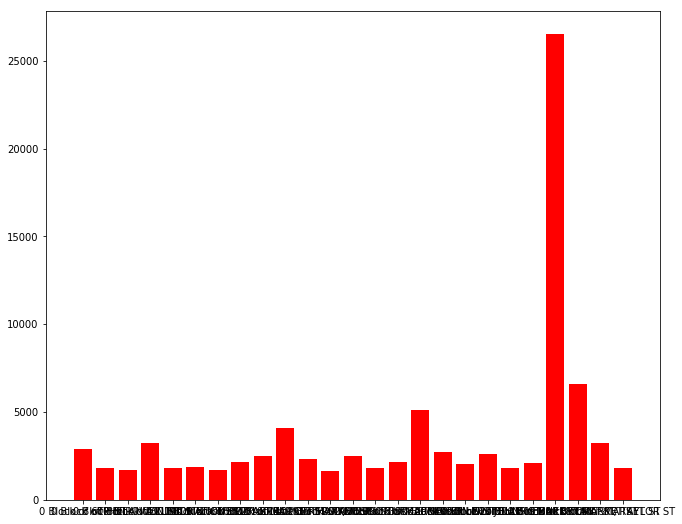

In [164]:
histdict = list(Counter(df['Address']).most_common(25))
x = []
y = []
# display(histdict)
for key in histdict:
    print(key)
    x.append(key[0])
    y.append(key[1])
display(Counter(df['Address']).most_common(25))
display(x[0])
width = .5

fig, ax = plot.subplots(figsize=(11, 9))
# ax.figure(figsize = (20,12))
ax.bar(x, y, color='r')


In [165]:
df[df["Descript"] == "ASSAULT, AGGRAVATED, W/ MACHINE GUN"]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
192220,2012-10-20 21:00:00,ASSAULT,"ASSAULT, AGGRAVATED, W/ MACHINE GUN",Saturday,INGLESIDE,NONE,4700 Block of MISSION ST,-122.436868,37.722049
321202,2010-12-04 09:25:00,ASSAULT,"ASSAULT, AGGRAVATED, W/ MACHINE GUN",Saturday,BAYVIEW,BOOKED,2800 Block of INGALLS ST,-122.391088,37.721314


# Lets predict some stuff...

In [166]:
#Clean the data

#800 Bryant street is the police station... What's going on here? 
#Let's remove everythign with this address
df_list = df.index[df["Address"] == "800 Block of BRYANT ST"].tolist()
cleaned_df = df.drop(df.index[df_list])
cleaned_df[cleaned_df["Address"] == "800 Block of BRYANT ST"]

# What are the dates doing for us? 
# Answer: They're making our lives more complicated. Get them outta here.
# Imagine all the dummy variables we're going to have to make for those addresses.
# Do we need them if we have lattitude and longitude?
cleaned_df.drop(["Dates", "Address", "Descript"], axis = 1, inplace=True)
cleaned_df.head()

,Category,DayOfWeek,PdDistrict,Resolution,X,Y
0,WARRANTS,Wednesday,NORTHERN,BOOKED,-122.425892,37.774599
1,OTHER OFFENSES,Wednesday,NORTHERN,BOOKED,-122.425892,37.774599
2,OTHER OFFENSES,Wednesday,NORTHERN,BOOKED,-122.424363,37.800414
3,LARCENY/THEFT,Wednesday,NORTHERN,NONE,-122.426995,37.800873
4,LARCENY/THEFT,Wednesday,PARK,NONE,-122.438738,37.771541


In [167]:
# cleaned[cleaned["Address"] == "800 Block of BRYANT ST"]

In [168]:
classfs = []
accuracy = []

resolution_hist = Counter(df["Resolution"])
display(resolution_hist)

cats = pd.Series(cleaned_df["Resolution"]).astype('category')
label_ints = cats.cat.codes
labels = cats

#Remove Labels from Dataset
cleaned_df.drop(["Resolution"], axis=1, inplace=True)
cleaned_df.head()

Counter({'BOOKED': 211967,
         'CITED': 80336,
         'CLEARED': 1747,
         'JUVENILE ADMONISHED': 1455,
         'JUVENILE DIVERTED': 355,
         'LOCATED': 17101,
         'NONE': 526790,
         'NOT PROSECUTED': 11624,
         'PROSECUTED': 2555,
         'PSYCHOPATHIC CASE': 14534,
         'UNFOUNDED': 9585})

,Category,DayOfWeek,PdDistrict,X,Y
0,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599
1,OTHER OFFENSES,Wednesday,NORTHERN,-122.425892,37.774599
2,OTHER OFFENSES,Wednesday,NORTHERN,-122.424363,37.800414
3,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873
4,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541


In [169]:
#This is how it's done Labels into numbers into labels according to stack overflow
# x = pd.Series(['a', 'a', 'a', 'b', 'b', 'c']).astype('category')
# display(x.cat.codes)
# display(x)
from sklearn.preprocessing import StandardScaler
cleaned_df = pd.get_dummies(cleaned_df, prefix='sf_')
# Create a StandardScaler() Object. 
scaler = StandardScaler()
# Call scaler.fit() on the data frame that will be rescaled.
scaler.fit(cleaned_df)

scaled_X_vals = scaler.transform(cleaned_df)

X_train, X_test, y_train, y_test = train_test_split(scaled_X_vals, label_ints, test_size=0.5)


In [170]:
#Using Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

clf = DecisionTreeClassifier()
fitted = clf.fit(X_train, y_train)
test_pred = clf.predict(X_test)


In [171]:
decision_accuracy = accuracy_score(y_test, test_pred)
classfs.append("DT")
accuracy.append(decision_accuracy)
print("accuracy score: {}".format(decision_accuracy))

accuracy score: 0.7040924656729879


In [172]:
#K nearest runtime is quadratic and a bit much for a small laptop working on 800k rows and >50 features
#Try this on a super computer and maybe it will finish within my lifetime

# from sklearn.neighbors import KNeighborsClassifier

# neigh = KNeighborsClassifier(n_neighbors=25)
# neigh.fit(X_train, y_train)
# pred = neigh.predict(X_test)
# accuracy = accuracy_score(y_test, pred, normalize=True, sample_weight = None)
# print("sklearn", accuracy)


In [173]:
# knn_accuracy = accuracy
# from sklearn.naive_bayes import GaussianNB
# # Create a GaussianNB() object and fit it using the training data
# clf = GaussianNB()
# clf.fit(X_train, y_train)
# # Use the fitted model to create predictions for the X_test data.
# preds = clf.predict(X_test)

In [174]:
from sklearn.naive_bayes import GaussianNB
# Create a GaussianNB() object and fit it using the training data
clf = GaussianNB()
clf.fit(X_train, y_train)
# Use the fitted model to create predictions for the X_test data.
preds = clf.predict(X_test)
accy = accuracy_score(y_test, preds)
classfs.append("GNB")
accuracy.append(accy)
print("accuracy score: {}".format(accy))

accuracy score: 0.016027884385026236


In [175]:
def create_confusion_matrix(predictions, labels):
    
    confusion_matrix = {"TP": 0, "TN": 0, "FP": 0, "FN": 0}
    label_list = list(labels.values.flatten())

    label_index = 0
    
    for row in predictions:

        if row == label_list[label_index]:
            
            if row == 1:
                confusion_matrix["TP"] += 1
            else:
                confusion_matrix["TN"] += 1
        else:
            if row == 1:
                confusion_matrix["FP"] += 1
            else:
                confusion_matrix["FN"] += 1
        label_index += 1

    print(confusion_matrix)
    return confusion_matrix

In [176]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=50)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
accy = accuracy_score(y_test, preds)

classfs.append("RF1")
accuracy.append(accy)
print("accuracy score: {}".format(accy))


accuracy score: 0.6843746917262858


In [177]:
clf = RandomForestClassifier(n_estimators=30, max_depth=4, min_samples_split=50)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
accy = accuracy_score(y_test, preds)

classfs.append("RF2")
accuracy.append(accy)
print("accuracy score: {}".format(accy))

accuracy score: 0.6505432663625815


In [178]:
clf = RandomForestClassifier(n_estimators=10, max_depth=4, min_samples_split=50)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
accy = accuracy_score(y_test, preds)

classfs.append("RF3")
accuracy.append(accy)
print("accuracy score: {}".format(accy))

accuracy score: 0.6501909535463808


In [179]:
clf = RandomForestClassifier(n_estimators=30, max_depth=1, min_samples_split=50)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
accy = accuracy_score(y_test, preds)

classfs.append("RF4")
accuracy.append(accy)
print("accuracy score: {}".format(accy))

accuracy score: 0.5960357761921091


In [180]:
clf = RandomForestClassifier(n_estimators=30, max_depth=2, min_samples_split=50)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
accy = accuracy_score(y_test, preds)

classfs.append("RF5")
accuracy.append(accy)
print("accuracy score: {}".format(accy))

accuracy score: 0.5960357761921091


In [181]:
clf = RandomForestClassifier(n_estimators=60, max_depth=16, min_samples_split=50)
clf.fit(X_train, y_train)
max_preds = clf.predict(X_test)
accy = accuracy_score(y_test, max_preds)

classfs.append("RF6")
accuracy.append(accy)
print("accuracy score: {}".format(accy))

accuracy score: 0.7438967676473489


In [182]:
clf = RandomForestClassifier(n_estimators=100, max_depth=16, min_samples_split=50)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
accy = accuracy_score(y_test, preds)

classfs.append("RF7")
accuracy.append(accy)
print("accuracy score: {}".format(accy))

accuracy score: 0.7456277979509487


In [183]:
create_confusion_matrix(max_preds, y_test)

{'TP': 16615, 'TN': 300105, 'FP': 14564, 'FN': 94474}


{'FN': 94474, 'FP': 14564, 'TN': 300105, 'TP': 16615}

0.09090909090909091


[]

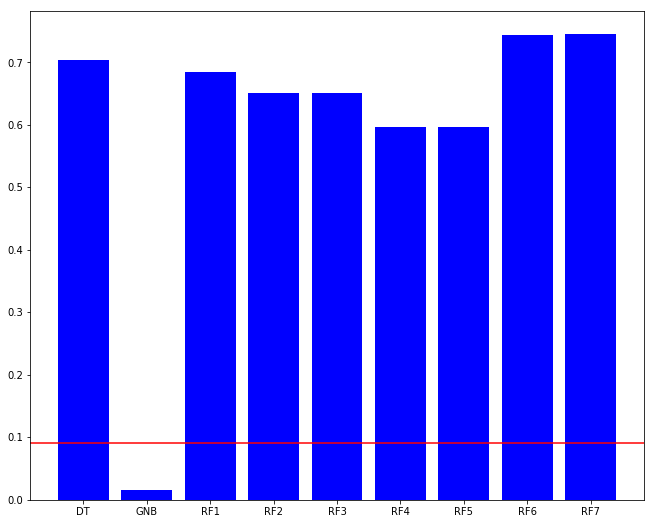

In [184]:
fig, ax = plot.subplots(figsize=(11, 9))
# ax.figure(figsize = (20,12))
ax.bar(classfs, accuracy, color='b')
random_chance = 1/num_labels
print(random_chance)
plot.axhline(y=random_chance, color='r', linestyle='-')
plot.plot()

# Summary

#### Naive Bayes is terrible for this dataset
#### Single decision tree gives good results
#### Bestest result from random forest
Best random forest results are when there are 60 trees at a max depth of 16 branches